In [ ]:
import numpy as mp
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/database.csv')
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
data=data[['Date','Time','Latitude','Longitude','Type','Depth','Magnitude','Magnitude Error','ID','Source','Location Source','Magnitude Source','Status']]
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Error,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Text(0.5, 1.0, 'All affected areas')

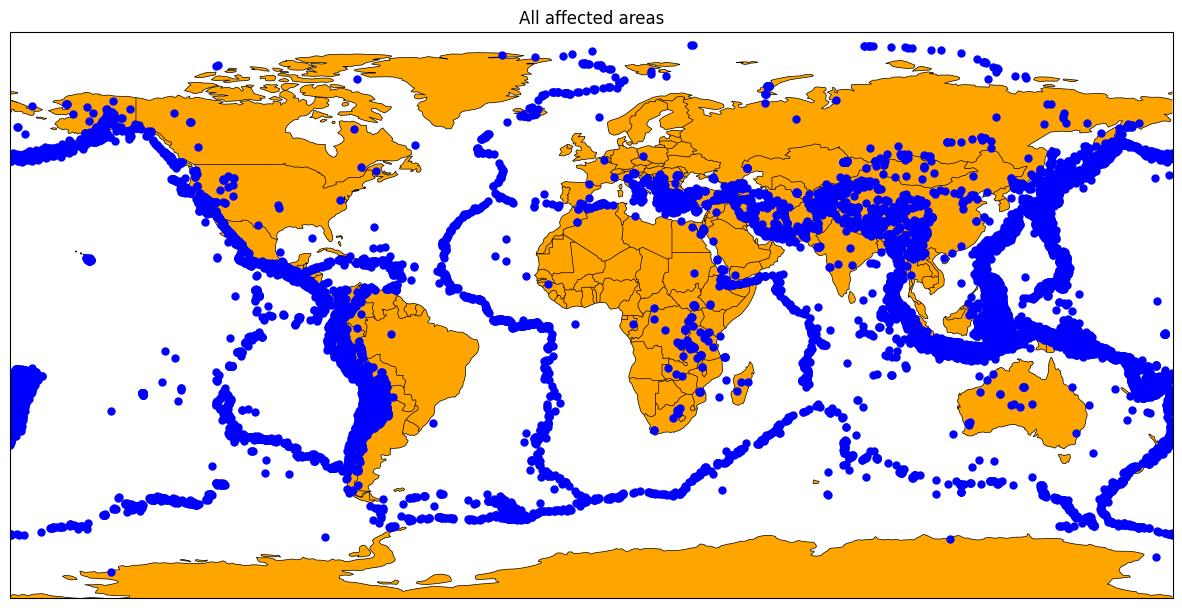

In [ ]:
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,12))
latitudes = data['Latitude']
longitudes = data['Longitude']

ax.set_title('All affected areas')
land = ax.add_feature(cfeature.LAND, facecolor='orange')
ax.plot(longitudes, latitudes, 'bo', markersize=5, label='Locations')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5)
ax.coastlines(linewidth=0.5)
min_lon, max_lon, min_lat, max_lat = min(longitudes), max(longitudes), min(latitudes), max(latitudes)
plt.title("All affected areas")


In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Latitude', 'Longitude']]
Y = data[['Magnitude','Depth']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
from hyperopt import fmin, tpe, hp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Define the search space for hyperparameters
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(16,), (64,), (128,), (256,)]),
    'batch_size': hp.choice('batch_size', [10, 20, 50, 100]),
    'max_iter': hp.choice('max_iter', [10, 20, 30]),
    'activation': hp.choice('activation', ['relu', 'tanh', 'logistic']),
    'solver': hp.choice('solver', ['adam', 'lbfgs']),  # Change to 'lbfgs' for regression
}

# Define a function to optimize
def objective(params):
    model = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        batch_size=params['batch_size'],
        max_iter=params['max_iter'],
        activation=params['activation'],
        solver=params['solver']
    )
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)  # Use the test set for evaluation
    return -score  # Minimize the negative score

# Perform hyperparameter tuning
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)  # Adjust max_evals as needed

# Print the best hyperparameters
print("Best Hyperparameters:", best)


(18729, 2) (4683, 2) (18729, 2) (4683, 2)
  2%|▏         | 1/50 [00:03<02:35,  3.17s/trial, best loss: 0.9523608540611577]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



  4%|▍         | 2/50 [00:04<01:48,  2.26s/trial, best loss: 0.5967622834450532]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



  6%|▌         | 3/50 [00:09<02:33,  3.26s/trial, best loss: -0.015296722515578676]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



  8%|▊         | 4/50 [00:22<05:25,  7.07s/trial, best loss: -0.07399100390963698] 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 10%|█         | 5/50 [00:29<05:18,  7.08s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 12%|█▏        | 6/50 [00:33<04:28,  6.10s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 14%|█▍        | 7/50 [00:34<03:15,  4.55s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



 16%|█▌        | 8/50 [00:52<06:04,  8.68s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 18%|█▊        | 9/50 [01:05<06:50, 10.02s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 20%|██        | 10/50 [01:17<07:10, 10.76s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 22%|██▏       | 11/50 [01:19<05:15,  8.10s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 24%|██▍       | 12/50 [01:20<03:43,  5.88s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 26%|██▌       | 13/50 [01:27<03:52,  6.29s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



 28%|██▊       | 14/50 [01:30<03:10,  5.29s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



 32%|███▏      | 16/50 [01:31<01:33,  2.76s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 34%|███▍      | 17/50 [01:32<01:13,  2.24s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 36%|███▌      | 18/50 [01:37<01:39,  3.10s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 38%|███▊      | 19/50 [01:38<01:12,  2.35s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 40%|████      | 20/50 [01:46<02:02,  4.10s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 42%|████▏     | 21/50 [01:59<03:19,  6.86s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 44%|████▍     | 22/50 [02:26<05:58, 12.81s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 46%|████▌     | 23/50 [02:39<05:46, 12.83s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 48%|████▊     | 24/50 [02:46<04:51, 11.21s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 50%|█████     | 25/50 [02:59<04:54, 11.80s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 52%|█████▏    | 26/50 [03:13<04:53, 12.22s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 54%|█████▍    | 27/50 [03:20<04:05, 10.68s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 56%|█████▌    | 28/50 [03:33<04:11, 11.42s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 58%|█████▊    | 29/50 [03:46<04:11, 11.96s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 60%|██████    | 30/50 [03:59<04:06, 12.31s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 62%|██████▏   | 31/50 [04:12<03:58, 12.57s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 64%|██████▍   | 32/50 [04:14<02:49,  9.39s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 66%|██████▌   | 33/50 [04:27<02:58, 10.48s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 68%|██████▊   | 34/50 [04:30<02:11,  8.21s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 70%|███████   | 35/50 [04:43<02:24,  9.65s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 72%|███████▏  | 36/50 [05:02<02:52, 12.29s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 74%|███████▍  | 37/50 [05:05<02:05,  9.69s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 76%|███████▌  | 38/50 [05:09<01:33,  7.82s/trial, best loss: -0.07399100390963698]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 78%|███████▊  | 39/50 [05:35<02:26, 13.33s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 80%|████████  | 40/50 [05:47<02:09, 13.00s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 82%|████████▏ | 41/50 [05:52<01:33, 10.40s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 84%|████████▍ | 42/50 [06:09<01:39, 12.48s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



 86%|████████▌ | 43/50 [06:23<01:30, 12.95s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 88%|████████▊ | 44/50 [06:29<01:04, 10.78s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



 90%|█████████ | 45/50 [06:29<00:38,  7.62s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 92%|█████████▏| 46/50 [06:33<00:25,  6.50s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



 94%|█████████▍| 47/50 [06:53<00:31, 10.53s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 96%|█████████▌| 48/50 [06:56<00:16,  8.25s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



 98%|█████████▊| 49/50 [07:00<00:07,  7.03s/trial, best loss: -0.09466721753983581]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



100%|██████████| 50/50 [07:05<00:00,  8.50s/trial, best loss: -0.09466721753983581]
Best Hyperparameters: {'activation': 1, 'batch_size': 0, 'hidden_layer_sizes': 3, 'max_iter': 2, 'solver': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



In [31]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, Y_test))

[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20


ValueError: ignored

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define a function to create a Keras model with variable hyperparameters
def create_model(neurons=16, activation='relu', optimizer='SGD', loss='squared_hinge'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

# Generate some example data
X, Y = make_classification(n_samples=100, n_features=10, random_state=42)

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define hyperparameter values to search over
neurons = [16, 64, 128, 256]
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
optimizer = [SGD(), RMSprop(), Adagrad(), Adadelta(), Adam(), Adamax(), Nadam()]
loss = ['squared_hinge']

best_models = []
best_scores = []

for n in neurons:
    for act in activation:
        for opt in optimizer:
            for l in loss:
                # Create a new model with the current hyperparameters
                model = create_model(neurons=n, activation=act, optimizer=opt, loss=l)

                # Fit the model on the training data
                model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

                # Evaluate the model on the validation data
                _, accuracy = model.evaluate(X_val, Y_val, verbose=0)

                # Store a copy of the model and its accuracy score
                best_models.append(model)
                best_scores.append(accuracy)

# Find the best model with the highest accuracy on the validation set
best_index = np.argmax(best_scores)
best_model = best_models[best_index]

# Make predictions on new data
new_data = np.array([[19.246, 145.616, 131.6]])  # Replace with your input features
predicted_magnitude = best_model.predict(new_data)
print("Predicted Magnitude: ", predicted_magnitude)


ValueError: ignored